In [1]:
from scipy.io import arff
import pandas as pd
from GAN2 import GAN

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Diabetes

In [2]:
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]
original_df = df.copy()
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
class_col = df['class']
df = df.drop(columns=['class'], axis=1)
scaler = MinMaxScaler()
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
df = pd.concat([df, class_col],axis=1)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [17]:
#Define the GAN and training parameters
noise_dim = 25
dim = 10
batch_size = 32

log_step = 10
epochs = 200
learning_rate = 5e-4
models_dir = 'model_diabetes'

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

9
0 [D loss: 0.702559, acc.: 50.00%] [G loss: 0.567976]
10 [D loss: 0.690169, acc.: 59.38%] [G loss: 0.718037]
20 [D loss: 0.674986, acc.: 68.75%] [G loss: 0.723365]
30 [D loss: 0.659083, acc.: 71.88%] [G loss: 0.735624]
40 [D loss: 0.643249, acc.: 76.56%] [G loss: 0.739282]
50 [D loss: 0.642859, acc.: 71.88%] [G loss: 0.768822]
60 [D loss: 0.654912, acc.: 67.19%] [G loss: 0.731502]
70 [D loss: 0.652374, acc.: 57.81%] [G loss: 0.769823]
80 [D loss: 0.625013, acc.: 78.12%] [G loss: 0.826732]
90 [D loss: 0.634798, acc.: 67.19%] [G loss: 0.890519]
100 [D loss: 0.646056, acc.: 65.62%] [G loss: 0.884059]
110 [D loss: 0.639968, acc.: 64.06%] [G loss: 0.812919]
120 [D loss: 0.600091, acc.: 73.44%] [G loss: 1.048864]
130 [D loss: 0.627803, acc.: 64.06%] [G loss: 0.921621]
140 [D loss: 0.610913, acc.: 70.31%] [G loss: 0.994911]
150 [D loss: 0.545203, acc.: 75.00%] [G loss: 0.976720]
160 [D loss: 0.536963, acc.: 79.69%] [G loss: 1.164118]
170 [D loss: 0.573724, acc.: 70.31%] [G loss: 1.090033]
1

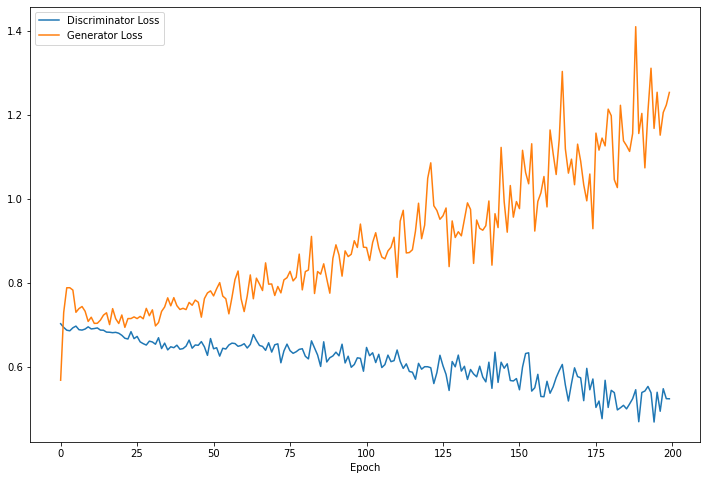

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history['D_loss'], label='Discriminator Loss')
ax.plot(history['G_loss'], label='Generator Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
from sklearn.decomposition import PCA

In [6]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [7]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [8]:
len(df)

768

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases
noise_dim = 25

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [23]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

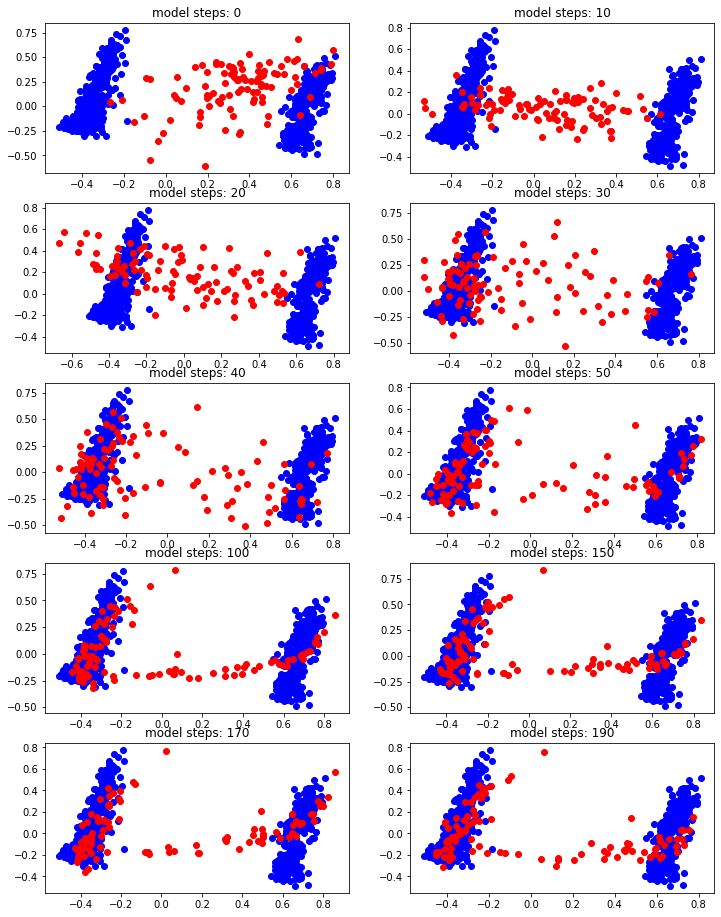

In [25]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 10, 20, 30, 40, 50, 100, 150, 170, 190]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [26]:
fooled_samples = scaler.inverse_transform(g_z[:,:-1])
generated_df = pd.DataFrame(fooled_samples)
generated_df['8'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
generated_df

,preg,plas,pres,skin,insu,mass,pedi,age,class,discriminator
0,4.0,89.0,70.0,48.0,37.0,41.0,0.0,48.0,0.0,1
1,1.0,104.0,56.0,20.0,4.0,30.0,0.0,25.0,0.0,0
2,-0.0,106.0,60.0,20.0,23.0,27.0,0.0,51.0,0.0,0
3,4.0,77.0,74.0,12.0,0.0,28.0,0.0,32.0,-0.0,0
4,1.0,70.0,63.0,20.0,0.0,31.0,0.0,23.0,-0.0,1
...,...,...,...,...,...,...,...,...,...,...
95,0.0,108.0,65.0,21.0,47.0,27.0,1.0,24.0,0.0,1
96,4.0,96.0,66.0,28.0,75.0,33.0,1.0,33.0,0.0,1
97,3.0,119.0,58.0,25.0,10.0,37.0,1.0,24.0,1.0,0
98,2.0,129.0,56.0,25.0,19.0,31.0,1.0,25.0,0.0,0


In [27]:
g_z[:,:-1].shape

(100, 8)

In [28]:
class_col = generated_df['class']
tmp = generated_df.drop(columns=['class' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.212415,0.446650,0.570175,0.486738,0.043237,0.609205,0.056029,0.443621,0.0
1,0.080516,0.524672,0.456030,0.198292,0.005289,0.448599,0.121460,0.061669,0.0
2,-0.013336,0.534059,0.490002,0.200293,0.027378,0.408612,0.119334,0.492006,0.0
3,0.244673,0.389075,0.607854,0.125538,-0.075322,0.421105,0.111814,0.180314,-0.0
4,0.050093,0.352425,0.516738,0.198928,-0.033696,0.460982,0.095313,0.027950,-0.0
...,...,...,...,...,...,...,...,...,...
95,0.013068,0.543609,0.529109,0.210725,0.056076,0.399596,0.181451,0.046740,0.0
96,0.243814,0.482816,0.543171,0.279847,0.088465,0.496535,0.215147,0.197411,0.0
97,0.194679,0.596245,0.474890,0.256445,0.011573,0.556972,0.240559,0.052211,1.0
98,0.103040,0.646887,0.461653,0.253467,0.022085,0.460671,0.288659,0.069284,0.0


In [29]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['class'].eq(1)])
generated_negative_emb = pca.transform(tmp[tmp['class'].eq(0)])
original_positive_emb = original_emb[df[df['class'].eq(1)].index.values]
original_negative_emb = original_emb[df[df['class'].eq(0)].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

In [35]:
generated_df['discriminator'].value_counts()

0    74
1    26
Name: discriminator, dtype: int64

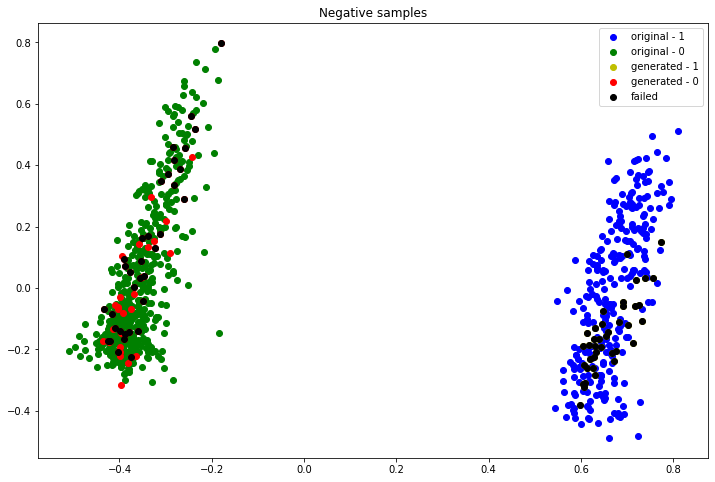

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Negative samples')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

In [32]:
generated_df['discriminator'].value_counts()

0    74
1    26
Name: discriminator, dtype: int64

In [37]:
tmp_generated = generated_df[generated_df['discriminator'].eq(1)]
tmp_generated = tmp_generated[tmp_generated['class'].eq(0)]
tmp_generated = tmp_generated.drop(columns=['discriminator', 'class'], axis=1)
tmp_generated

,preg,plas,pres,skin,insu,mass,pedi,age
0,4.0,89.0,70.0,48.0,37.0,41.0,0.0,48.0
4,1.0,70.0,63.0,20.0,0.0,31.0,0.0,23.0
8,-0.0,91.0,69.0,26.0,93.0,31.0,1.0,24.0
22,2.0,101.0,83.0,20.0,0.0,31.0,1.0,18.0
24,1.0,91.0,66.0,23.0,78.0,32.0,1.0,39.0
29,2.0,91.0,66.0,18.0,23.0,30.0,1.0,29.0
35,0.0,93.0,74.0,16.0,0.0,26.0,0.0,26.0
38,1.0,89.0,61.0,11.0,31.0,27.0,0.0,22.0
43,5.0,83.0,63.0,20.0,38.0,32.0,0.0,39.0
44,-0.0,110.0,68.0,38.0,67.0,32.0,1.0,24.0


In [38]:
tmp_original = original_df
tmp_original = tmp_original[tmp_original['class'].eq(b'tested_negative')]
tmp_original = tmp_original.drop(columns=['class'], axis=1)
tmp_original

,preg,plas,pres,skin,insu,mass,pedi,age
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0
...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0


In [39]:
from sklearn.metrics.pairwise import euclidean_distances

In [40]:
euclidean_distances(X=tmp_original, Y=tmp_original).mean()

114.76525755980178

In [41]:
generated_distances = euclidean_distances(X=tmp_generated, Y=tmp_original)
print(f'distances shape: {generated_distances.shape}')
generated_distances.mean()

distances shape: (26, 500)


94.59992054724292

# German Credit

In [94]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
original_df = pd.DataFrame(data[0])
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [3]:
from sklearn.model_selection import train_test_split
class Data:

    def __init__(self, name_data):
        self.name_data = name_data
        self.df = None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None

    def load_data(self, read_csv=False, normalization=True, RF=False):
        if read_csv:
            self.df = pd.read_csv(self.name_data + ".csv")
        else:
            read = arff.loadarff(self.name_data)
            self.df = pd.DataFrame(read[0])

        self.refactor_categorical()
        self.split_data(RF)
        if normalization:
            self.normalization()
        self.describe_data()

    def refactor_categorical(self, ordinal_encoder=True):
        object_df = self.df.select_dtypes(include=['object'])
        if ordinal_encoder:
            from sklearn.preprocessing import OrdinalEncoder
            for col in object_df.columns:
                ord_enc = OrdinalEncoder()
                self.df[col] = ord_enc.fit_transform(object_df[[col]])
        else:
            keep_col = [x for x in list(self.df.columns) if x not in list(object_df.columns)]
            new = self.df[keep_col].copy()
            index = 0
            for col in object_df.columns:
                enc = OneHotEncoder(handle_unknown='ignore')
                # passing bridge-types-cat column (label encoded values of bridge_types)
                enc_df = pd.DataFrame(enc.fit_transform(object_df[[col]]).toarray(),
                                      columns=[str(i) + "A" for i in range(index, index + object_df[[col]].nunique()[0])])
                index = object_df[[col]].nunique()[0] + index
                new = new.join(enc_df)
            self.df = new


        self.df.to_csv(f"{self.name_data}.csv", index=False)

    def split_data(self, RF):
        y = self.df.pop(self.df.columns[-1])
        x = self.df
        if not RF:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
        else:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

    def normalization(self):
        self.scaler = MinMaxScaler((-1, 1))
        self.scaler.fit(self.X_train)
        self.X_train = self.scaler.transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)

    def describe_data(self):
        self.df.describe().to_csv(f"{self.name_data}_describe.csv")

In [4]:
d = Data('Assignment 4 files/german_credit.arff')

In [5]:
d.load_data()

In [6]:
df = pd.read_csv('Assignment 4 files/german_credit.arff.csv')

In [95]:
columns = original_df.columns

In [96]:
import re
for column in columns:
    if original_df[column].dtype == object:
        original_df[column] = original_df[column].apply(lambda x: x.decode("utf-8"))

In [98]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [99]:
columns = df.columns

In [100]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [101]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,11,6.0,34,43,1169.0,65,75,4.0,93,101,...,121,67.0,143,152,2.0,173,1.0,192,201,1
1,12,48.0,32,43,5951.0,61,73,2.0,92,101,...,121,22.0,143,152,1.0,173,1.0,191,201,2
2,14,12.0,34,46,2096.0,61,74,2.0,93,101,...,121,49.0,143,152,1.0,172,2.0,191,201,1
3,11,42.0,32,42,7882.0,61,74,2.0,93,103,...,122,45.0,143,153,1.0,173,2.0,191,201,1
4,11,24.0,33,40,4870.0,61,73,3.0,93,101,...,124,53.0,143,153,2.0,173,2.0,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12.0,32,42,1736.0,61,74,3.0,92,101,...,121,31.0,143,152,1.0,172,1.0,191,201,1
996,11,30.0,32,41,3857.0,61,73,4.0,91,101,...,122,40.0,143,152,1.0,174,1.0,192,201,1
997,14,12.0,32,43,804.0,61,75,4.0,93,101,...,123,38.0,143,152,1.0,173,1.0,191,201,1
998,11,45.0,32,43,1845.0,61,73,4.0,93,101,...,124,23.0,143,153,1.0,173,1.0,192,201,2


In [102]:

# class_col = df['21']
# df = df.drop(columns=['21'], axis=1)
scaler = MinMaxScaler((-1, 1))
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df = pd.concat([df, class_col],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [103]:
import re

In [51]:
#Define the GAN and training parameters
noise_dim = 50
dim = 21
batch_size = 32

log_step = 10
epochs = 200+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

0 [D loss: 0.684284, acc.: 48.44%] [G loss: 0.574249]
10 [D loss: 0.653528, acc.: 60.94%] [G loss: 0.785950]
20 [D loss: 0.552347, acc.: 87.50%] [G loss: 0.932054]
30 [D loss: 0.484250, acc.: 87.50%] [G loss: 0.972713]
40 [D loss: 0.470020, acc.: 87.50%] [G loss: 1.087191]
50 [D loss: 0.437943, acc.: 92.19%] [G loss: 1.196179]
60 [D loss: 0.347155, acc.: 93.75%] [G loss: 1.368294]
70 [D loss: 0.346474, acc.: 92.19%] [G loss: 1.516792]
80 [D loss: 0.380601, acc.: 84.38%] [G loss: 1.515340]
90 [D loss: 0.263868, acc.: 96.88%] [G loss: 1.631827]
100 [D loss: 0.267943, acc.: 98.44%] [G loss: 2.153333]
110 [D loss: 0.231715, acc.: 98.44%] [G loss: 2.061647]
120 [D loss: 0.224281, acc.: 95.31%] [G loss: 2.110578]
130 [D loss: 0.238153, acc.: 93.75%] [G loss: 2.072339]
140 [D loss: 0.233674, acc.: 93.75%] [G loss: 2.132800]
150 [D loss: 0.177284, acc.: 96.88%] [G loss: 2.216220]
160 [D loss: 0.198996, acc.: 95.31%] [G loss: 2.705093]
170 [D loss: 0.176115, acc.: 95.31%] [G loss: 2.753885]
180

In [17]:
from sklearn.decomposition import PCA

In [52]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [53]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [54]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [55]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

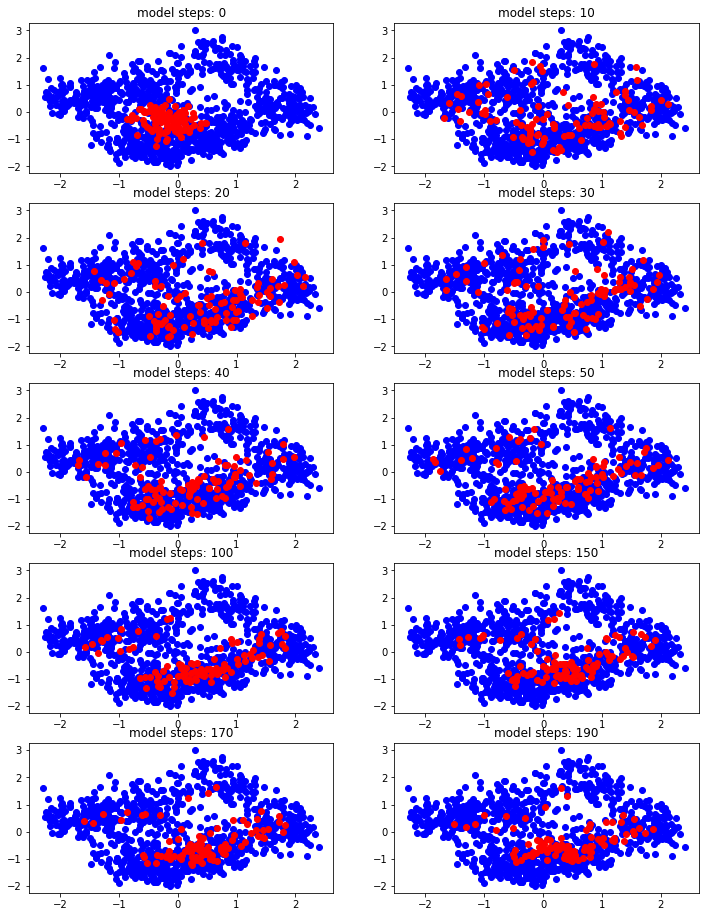

In [82]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 10, 20, 30, 40, 50, 100, 150, 170, 190]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [104]:
A_columns = original_df.columns[original_df.dtypes == object][:-1]

In [105]:
A_columns

Index(['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20'], dtype='object')

In [106]:
fooled_samples = scaler.inverse_transform(g_z)
generated_df = pd.DataFrame(fooled_samples)
# generated_df['20'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df['21'] = generated_df['21'].apply(lambda v: 2 if v >= 1.5 else 1)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
for a_column in A_columns:
    generated_df[a_column] = generated_df[a_column].apply(lambda v: f'A{int(v)}')
generated_df

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,discriminator
0,A11,16.0,A33,A40,2231.0,A61,A75,3.0,A93,A101,...,37.0,A143,A152,1.0,A172,1.0,A191,A201,1,0
1,A14,21.0,A33,A41,3780.0,A61,A73,3.0,A93,A101,...,43.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
2,A12,8.0,A32,A40,3380.0,A61,A74,1.0,A93,A101,...,45.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
3,A12,14.0,A33,A51,4043.0,A61,A73,3.0,A93,A101,...,43.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
4,A12,47.0,A32,A40,5786.0,A61,A74,3.0,A93,A101,...,30.0,A143,A152,1.0,A172,1.0,A191,A201,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A12,15.0,A32,A40,1916.0,A61,A72,4.0,A93,A101,...,22.0,A142,A152,1.0,A173,1.0,A191,A201,1,0
96,A12,15.0,A32,A42,3855.0,A61,A73,2.0,A93,A101,...,39.0,A143,A152,1.0,A173,1.0,A191,A201,1,0
97,A11,27.0,A32,A40,3021.0,A61,A73,2.0,A93,A101,...,26.0,A142,A152,1.0,A173,1.0,A191,A201,1,0
98,A12,23.0,A32,A41,4457.0,A61,A74,3.0,A93,A101,...,45.0,A143,A152,1.0,A173,1.0,A191,A201,1,0


In [107]:
fooled_samples[:, -1]

array([1.009995 , 1.00079  , 1.0000091, 1.0059751, 1.9159491, 1.0000002,
       1.6865396, 1.8346963, 1.001284 , 1.0001583, 1.0003461, 1.0010853,
       1.000051 , 1.069481 , 1.9899824, 1.0043304, 1.1654562, 1.021885 ,
       1.0362308, 1.0046456, 1.3959572, 1.0577976, 1.0097558, 1.0121077,
       1.0057454, 1.9893433, 1.0004184, 1.0444336, 1.0000163, 1.8357339,
       1.0200108, 1.0555   , 1.0149856, 1.6763339, 1.0129614, 1.0048674,
       1.1702307, 1.0151823, 1.9211216, 1.0005847, 1.1775104, 1.8384273,
       1.1931248, 1.000781 , 1.2339089, 1.2635257, 1.0026597, 1.6282879,
       1.6735697, 1.8141444, 1.0227897, 1.0102682, 1.0012888, 1.955837 ,
       1.0000005, 1.0029376, 1.9613516, 1.2561694, 1.0052618, 1.0059108,
       1.0002104, 1.9613432, 1.0009761, 1.8279518, 1.0622118, 1.1150867,
       1.3648506, 1.1148312, 1.0040803, 1.9399109, 1.0749012, 1.9452043,
       1.000032 , 1.0000951, 1.3892055, 1.0110769, 1.0429038, 1.004679 ,
       1.1835756, 1.1493953, 1.0009483, 1.2012808, 

In [108]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [109]:
class_col = generated_df['21']
tmp = generated_df.drop(columns=['21' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-0.942777,-0.642286,0.484392,-0.999831,-0.782030,-0.993892,0.863137,0.292249,0.271961,-0.998664,...,-0.423774,-0.345595,0.992954,-0.187539,-0.969335,-0.247415,-1.000000,-0.999840,-0.999988,1
1,0.690747,-0.494295,0.312595,-0.991964,-0.611565,-0.976224,0.186883,0.358705,0.406964,-0.998141,...,-0.593056,-0.132286,0.944789,-0.021991,-0.925480,0.038595,-0.994971,-0.438307,-0.944664,1
2,-0.619116,-0.895726,0.097121,-0.999936,-0.655606,-0.887477,0.640611,-0.859846,0.262189,-0.999873,...,0.518374,-0.075378,0.937753,-0.264429,-0.999563,0.206537,-0.981552,-0.999996,-0.998945,1
3,-0.414457,-0.708667,0.457929,-0.939057,-0.582606,-0.959546,0.133916,0.026268,0.035250,-0.996917,...,-0.147182,-0.137991,0.978092,-0.205493,-0.809735,0.381543,-0.996694,-0.965281,-0.974788,1
4,-0.244721,0.261973,0.000183,-0.999929,-0.390770,-0.872119,0.565325,0.066089,0.294042,-0.984725,...,-0.473130,-0.616470,0.918834,0.312714,-0.985543,-0.091957,-0.998586,-0.999146,-0.999419,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.609512,-0.684883,0.112695,-0.999686,-0.816626,-0.945279,-0.355168,0.935654,0.500472,-0.999997,...,0.343788,-0.878597,0.010970,0.185210,-0.999511,0.292551,-1.000000,-1.000000,-0.999999,1
96,-0.569160,-0.681737,0.186202,-0.986925,-0.603329,-0.848378,0.224723,-0.101592,0.304973,-0.998724,...,0.245833,-0.289752,0.682983,-0.131785,-0.987515,0.535291,-0.998781,-0.999429,-0.991140,1
97,-0.782355,-0.310861,-0.139323,-0.998774,-0.695062,-0.980849,0.191161,-0.276560,0.025220,-0.999262,...,0.066110,-0.742480,0.318293,-0.418560,-0.971272,0.227286,-0.999060,-0.999968,-0.999822,1
98,-0.471538,-0.442823,0.201606,-0.993847,-0.537051,-0.969340,0.310610,0.199769,0.262034,-0.960641,...,-0.655138,-0.070477,0.984666,0.055597,-0.953505,0.122396,-0.998887,-0.642947,-0.985782,1


In [110]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [111]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['21'].eq(2)])
generated_negative_emb = pca.transform(tmp[tmp['21'].eq(1)])
original_positive_emb = original_emb[original_df[original_df['21'].eq('2')].index.values]
original_negative_emb = original_emb[original_df[original_df['21'].eq('1')].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

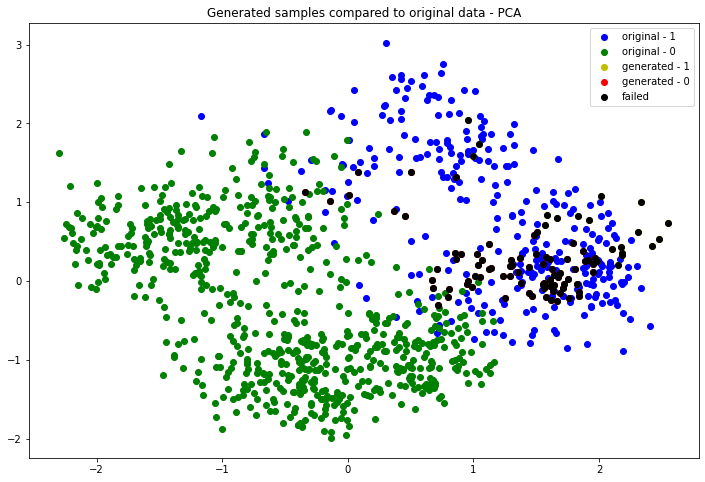

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Generated samples compared to original data - PCA')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

### PART 2

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [181]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (537, 8)
test shape: (231, 8)


In [182]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

In [183]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

class Generator_RF():
    def __init__(self, batch_size, C):
        self.batch_size = batch_size
        self.C = C

    def build_model(self, input_shape, dim, data_dim):
        input_Z = Input(shape=input_shape, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_Z, input_C])
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=[input_Z, input_C], outputs=x)

In [184]:
class Discriminator_RF():
    def __init__(self, batch_size, C):
        self.batch_size = batch_size
        self.C = C

    def build_model(self, input_shape, dim):
        input_sample = Input(shape=input_shape, batch_size=self.batch_size)
        input_Y = Input(shape=1, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_sample, input_Y, input_C])
        x = Dense(dim * 4, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=[input_sample, input_Y, input_C], outputs=x)

In [185]:
import tensorflow as tf
class GAN_RF():

    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim, self.C] = gan_args

        self.generator = Generator_RF(self.batch_size, self.C). \
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator_RF(self.batch_size, self.C). \
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        c = Input(shape=(1,))
        record = self.generator([z, c])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        y = Input(shape=(1,))
        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator([record, y, c])

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model([z, y,c], validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))

    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments

        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))
        # C = np.full((self.batch_size, 1), 0.8)
        history = {'D_loss': [],
                   'D_acc': [],
                   'G_loss': []}
        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            C = np.random.uniform(0, 1, self.batch_size)
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict([noise, C])
            batch_x = batch_data[:,:-1]
            bb_y = clf.predict_proba(batch_x)
            # Train the discriminator
            bb_gen_data_y = clf.predict_proba(gen_data[:,:-1])
            d_loss_real = self.discriminator.train_on_batch([batch_data, bb_y[:,0], C], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_data, bb_gen_data_y[:,0], C], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch([noise, valid, C], valid)
            
            if epoch % 100 == 0:
                # Plot the progress
                print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            history['D_loss'].append(d_loss[0])
            history['D_acc'].append(100 * d_loss[1])
            history['G_loss'].append(g_loss)
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                # Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

        return history

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return

    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator

In [186]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_diabetes'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = ['', epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)

In [187]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.683774, acc.: 50.00%] [G loss: 0.575811]
100 [D loss: 0.678970, acc.: 54.69%] [G loss: 0.732207]
200 [D loss: 0.694732, acc.: 53.12%] [G loss: 0.666466]
300 [D loss: 0.692958, acc.: 51.56%] [G loss: 0.658693]
400 [D loss: 0.691334, acc.: 48.44%] [G loss: 0.662901]
500 [D loss: 0.692485, acc.: 46.88%] [G loss: 0.656460]
600 [D loss: 0.689458, acc.: 48.44%] [G loss: 0.670757]
700 [D loss: 0.699871, acc.: 40.62%] [G loss: 0.682212]
800 [D loss: 0.686692, acc.: 48.44%] [G loss: 0.655550]
900 [D loss: 0.695950, acc.: 43.75%] [G loss: 0.677961]
1000 [D loss: 0.689486, acc.: 56.25%] [G loss: 0.677975]
1100 [D loss: 0.688441, acc.: 53.12%] [G loss: 0.651317]
1200 [D loss: 0.689315, acc.: 51.56%] [G loss: 0.658052]
1300 [D loss: 0.678823, acc.: 65.62%] [G loss: 0.638240]
1400 [D loss: 0.688237, acc.: 54.69%] [G loss: 0.670332]
1500 [D loss: 0.673813, acc.: 59.38%] [G loss: 0.666547]
1600 [D loss: 0.684419, acc.: 59.38%] [G loss: 0.655295]
1700 [D loss: 0.683284, acc.: 51.56%] [G lo

In [188]:
from sklearn.decomposition import PCA

In [189]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [190]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 500 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [191]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

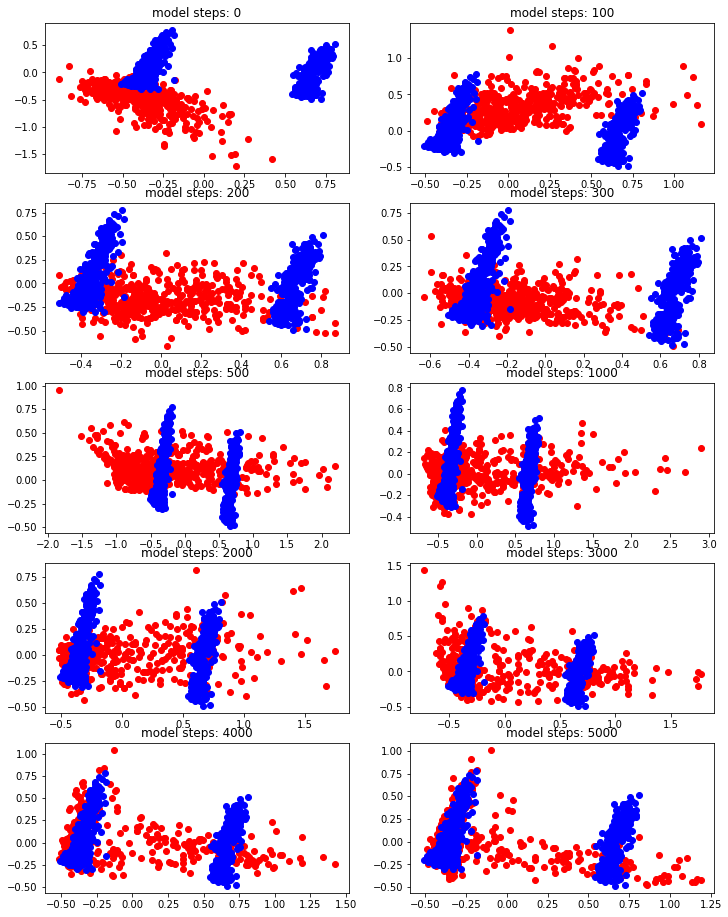

In [192]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, 500)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [ ]:
import numpy as np

In [193]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [197]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded_1 = scalar.transform(df[df['class'].eq(1)].values)
X_embedded_2 = scalar.transform(df[df['class'].eq(0)].values)

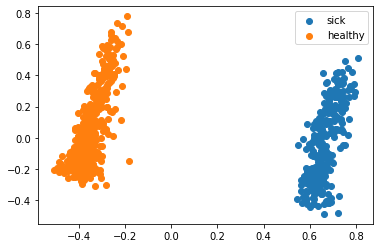

In [200]:
plt.scatter(X_embedded_1[:, 0], X_embedded_1[:, 1], label='sick')
plt.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], label='healthy')


plt.legend()
plt.show()